In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#this library allows us to split the data set to training and testing data
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

#this library allows us to load the linear regression model
from sklearn.linear_model import LinearRegression

#this library allow us to use sthis statistical tools
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#library allows exportation of a model
import pickle

In [2]:
#url and reading url
houses = pd.read_csv('https://raw.githubusercontent.com/Quedsten/House-Price-Prediction/refs/heads/main/house_price_regression_dataset.csv')

In [3]:
#looking at the dataset
houses

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [4]:
print(min(houses['Neighborhood_Quality']), max(houses['Neighborhood_Quality']))
print(min(houses['Garage_Size']), max(houses['Garage_Size']))

1 10
0 2


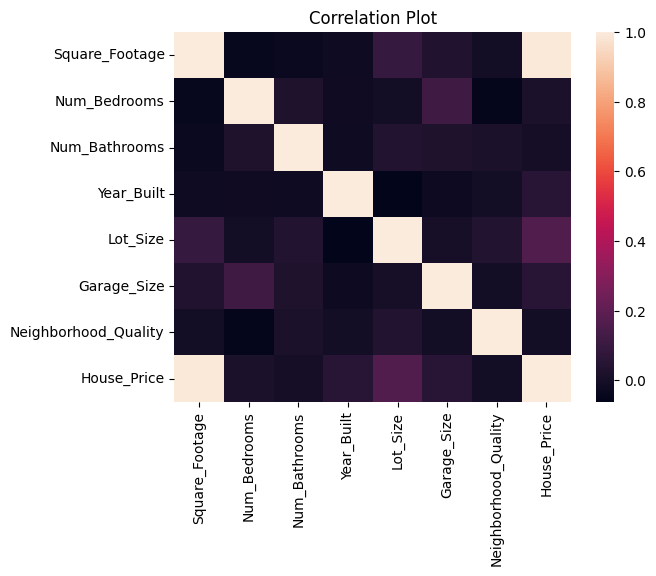

In [5]:
#Genegrating a correlation matrix
sns.heatmap(houses.corr())
#creating title
plt.title('Correlation Plot')
plt.show()

In [6]:
#looking at the features of the dataset
houses.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [7]:
#looking at how much data the dataset has
houses.shape

(1000, 8)

In [8]:
#what datatypes does the dataset have
houses.dtypes

,0
Square_Footage,int64
Num_Bedrooms,int64
Num_Bathrooms,int64
Year_Built,int64
Lot_Size,float64
Garage_Size,int64
Neighborhood_Quality,int64
House_Price,float64


In [9]:
#checking if the dataset has any null values
houses.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


Normally columns with catagorial data need to be Encoded.
pd.get_dummies(df, columns=[]) won't be necessary because we have no categorial data.

Another way to encode would be to use OneHotEncoder which instead of making multiple columns of 0 and 1 it would create a single column with numbers representing a catergory such as 1,2,3 for big, medium, small. In order to use OneHotEncoder you will have to import the library 'from sklearn.preprocessing import OneHotEncoder'.

If the dataset did I would drop the encoded column in orginal dataframe.
Concatenate encoded results into dataframe.



In [10]:
#Separating our data into features (x) and target (y)
#Will not consider price because price is our target
x = houses.drop('House_Price', axis = 1)
y = houses['House_Price']

In [11]:
#split the dataset into training and testing sets of 70/30
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 30, random_state = 10)

In [12]:
#creating the model and fit (train on the training data)
LR = LinearRegression()
LR.fit(x_train, y_train)


LinearRegression()

In [13]:
#model evaluation on data it never seen before
y_pred = LR.predict(x_test)

In [14]:
#calculating the coefficients
coefficients = LR.coef_
print(f'Coefficients: {coefficients}')

Coefficients: [  199.78618091 10129.26852437  8425.54958147   984.90734659
 14905.50202059  5176.20027402    66.16764433]


In [15]:
#calculating the intercept
intercept = LR.intercept_
print(f'Intercept: {intercept}')


Intercept: -1994153.2713412284


In [16]:
#calculating r-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9978324572309566


In [17]:
#calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 101403429.81620185


In [18]:
#calculating Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f'Mean Squared Error: {rmse}')

Mean Squared Error: 10069.927001532924


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
#calulating Absolute Mean Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 7049.0613241102665


In [20]:
y_pred

array([ 679350.83675224, 1056632.95771333,  985481.53569152,
        660671.08539885,  384211.24315678,  323477.29429983,
        507026.63539688,  525769.40072156,  640483.10882702,
        516839.58223672,  834007.33607566,  761402.61019803,
        860623.61797575,  315634.38499415,  975960.59566342,
        846559.38968418,  553856.47749548,  690595.25026683,
        592300.59158621,  747003.91469392,  975718.07376126,
       1011470.77458849,  897046.29215461,  800621.94510769,
        742708.98633228,  741421.92839875,  866719.39766738,
        503452.30309731, 1067384.41073241,  374953.02109442])

In [21]:
#export the model as pickle

with open('house_price_prediction_model.pkl', 'wb') as f:
    pickle.dump(LR, f)